# 국내 COVID-19 백신접종 완료 시계열 분석

In [1]:
from dateutil.parser import parse
import matplotlib
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
import pandas as pd
import statsmodels.tsa.api as tsa
import itertools

matplotlib.rcParams['font.family'] = 'Malgun Gothic'
matplotlib.rcParams['font.size'] = 15
matplotlib.rcParams['axes.unicode_minus'] = False

In [2]:
vc = pd.read_excel("코로나바이러스감염증-19_백신별_일일_접종현황_20211209(0시 기준).xls", skiprows = [0, 1, 2, 3, 4, 5])
vc

,Unnamed: 0,1차,2차,3차(부스터),1차.1,2차\n(AZ-PF교차포함),1차.2,2차\n(교차미포함),1차.3,1차.4,2차\n(M-Pf 교차 포함),Unnamed: 11,Unnamed: 12,Unnamed: 13
0,2021-12-08,42822222,41509745,4843497,11121386,11040155,23481036,22504204,1501734,6718066,6463652,3670305,1155867,17325
1,2021-02-26,28879,5411,0,21647,885,2272,1232,20,4940,3274,0,0,0
2,2021-02-27,30437,5493,0,22768,890,2667,1257,22,4980,3324,0,0,0
3,2021-02-28,31363,5545,0,23352,890,2993,1288,22,4996,3345,0,0,0
4,2021-03-01,33047,5624,0,24568,914,3365,1314,25,5089,3371,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
282,2021-12-04,42683867,41347366,3958074,11121379,11037699,23356762,22373612,1500872,6704854,6435183,3030810,911356,15908
283,2021-12-05,42685616,41349371,3961784,11121379,11037714,23358261,22375251,1500904,6705072,6435502,3033226,912520,16038
284,2021-12-06,42738395,41415876,4250596,11121386,11038445,23405509,22430102,1501168,6710332,6446161,3246051,988238,16307
285,2021-12-07,42776731,41458373,4544343,11121386,11039283,23439592,22462230,1501411,6714342,6455449,3461908,1065751,16684


In [3]:
vc.columns

Index(['Unnamed: 0', '1차', '2차', '3차(부스터)', '1차.1', '2차\n(AZ-PF교차포함)', '1차.2',
       '2차\n(교차미포함)', '1차.3', '1차.4', '2차\n(M-Pf 교차 포함)', 'Unnamed: 11',
       'Unnamed: 12', 'Unnamed: 13'],
      dtype='object')

In [4]:
vc1 = vc.drop(columns=['1차.1', '2차\n(AZ-PF교차포함)', '1차.2',
       '2차\n(교차미포함)', '1차.3', '1차.4', '2차\n(M-Pf 교차 포함)', 'Unnamed: 11',
       'Unnamed: 12', 'Unnamed: 13'])
vc1

,Unnamed: 0,1차,2차,3차(부스터)
0,2021-12-08,42822222,41509745,4843497
1,2021-02-26,28879,5411,0
2,2021-02-27,30437,5493,0
3,2021-02-28,31363,5545,0
4,2021-03-01,33047,5624,0
...,...,...,...,...
282,2021-12-04,42683867,41347366,3958074
283,2021-12-05,42685616,41349371,3961784
284,2021-12-06,42738395,41415876,4250596
285,2021-12-07,42776731,41458373,4544343


In [5]:
vc2 = vc1.drop(index=0)
vc2

,Unnamed: 0,1차,2차,3차(부스터)
1,2021-02-26,28879,5411,0
2,2021-02-27,30437,5493,0
3,2021-02-28,31363,5545,0
4,2021-03-01,33047,5624,0
5,2021-03-02,99690,5743,0
...,...,...,...,...
282,2021-12-04,42683867,41347366,3958074
283,2021-12-05,42685616,41349371,3961784
284,2021-12-06,42738395,41415876,4250596
285,2021-12-07,42776731,41458373,4544343


In [6]:
vc2.columns = ['일자', '1차', '접종완료', '부스터']
vc2

,일자,1차,접종완료,부스터
1,2021-02-26,28879,5411,0
2,2021-02-27,30437,5493,0
3,2021-02-28,31363,5545,0
4,2021-03-01,33047,5624,0
5,2021-03-02,99690,5743,0
...,...,...,...,...
282,2021-12-04,42683867,41347366,3958074
283,2021-12-05,42685616,41349371,3961784
284,2021-12-06,42738395,41415876,4250596
285,2021-12-07,42776731,41458373,4544343


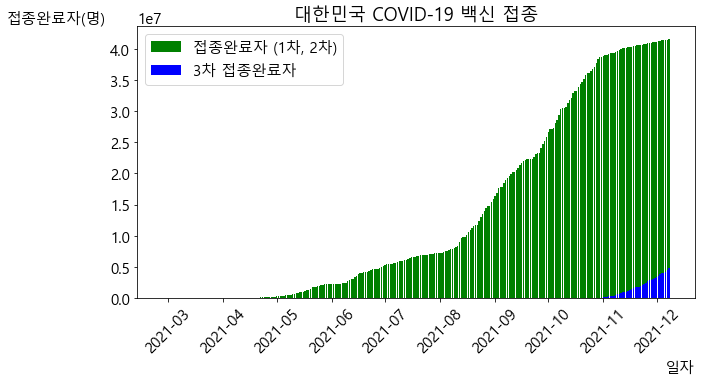

In [7]:
plt.figure(figsize=(10, 5))
plt.title('대한민국 COVID-19 백신 접종')
plt.bar(vc2['일자'], vc2['접종완료'], color='green', label='접종완료자 (1차, 2차)')
plt.bar(vc2['일자'], vc2['부스터'], color='blue', label='3차 접종완료자')

plt.legend(loc='upper left');

plt.xlabel('일자',loc='right')
plt.xticks(rotation=45);
plt.ylabel('접종완료자(명)', rotation=0, loc='top');

In [8]:
vc3 = vc.drop(columns=['1차', '2차', '3차(부스터)', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13'])
vc3

,Unnamed: 0,1차.1,2차\n(AZ-PF교차포함),1차.2,2차\n(교차미포함),1차.3,1차.4,2차\n(M-Pf 교차 포함)
0,2021-12-08,11121386,11040155,23481036,22504204,1501734,6718066,6463652
1,2021-02-26,21647,885,2272,1232,20,4940,3274
2,2021-02-27,22768,890,2667,1257,22,4980,3324
3,2021-02-28,23352,890,2993,1288,22,4996,3345
4,2021-03-01,24568,914,3365,1314,25,5089,3371
...,...,...,...,...,...,...,...,...
282,2021-12-04,11121379,11037699,23356762,22373612,1500872,6704854,6435183
283,2021-12-05,11121379,11037714,23358261,22375251,1500904,6705072,6435502
284,2021-12-06,11121386,11038445,23405509,22430102,1501168,6710332,6446161
285,2021-12-07,11121386,11039283,23439592,22462230,1501411,6714342,6455449


In [9]:
vc3.columns = ['일자', 'AZ 1차', 'AZ 2차', 'PF 1차', 'PF 2차', '얀센', 'M 1차', 'M 2차']
vc3

,일자,AZ 1차,AZ 2차,PF 1차,PF 2차,얀센,M 1차,M 2차
0,2021-12-08,11121386,11040155,23481036,22504204,1501734,6718066,6463652
1,2021-02-26,21647,885,2272,1232,20,4940,3274
2,2021-02-27,22768,890,2667,1257,22,4980,3324
3,2021-02-28,23352,890,2993,1288,22,4996,3345
4,2021-03-01,24568,914,3365,1314,25,5089,3371
...,...,...,...,...,...,...,...,...
282,2021-12-04,11121379,11037699,23356762,22373612,1500872,6704854,6435183
283,2021-12-05,11121379,11037714,23358261,22375251,1500904,6705072,6435502
284,2021-12-06,11121386,11038445,23405509,22430102,1501168,6710332,6446161
285,2021-12-07,11121386,11039283,23439592,22462230,1501411,6714342,6455449


In [10]:
vc4 = vc3.drop(index=0)
vc4

,일자,AZ 1차,AZ 2차,PF 1차,PF 2차,얀센,M 1차,M 2차
1,2021-02-26,21647,885,2272,1232,20,4940,3274
2,2021-02-27,22768,890,2667,1257,22,4980,3324
3,2021-02-28,23352,890,2993,1288,22,4996,3345
4,2021-03-01,24568,914,3365,1314,25,5089,3371
5,2021-03-02,90400,935,4092,1352,26,5172,3430
...,...,...,...,...,...,...,...,...
282,2021-12-04,11121379,11037699,23356762,22373612,1500872,6704854,6435183
283,2021-12-05,11121379,11037714,23358261,22375251,1500904,6705072,6435502
284,2021-12-06,11121386,11038445,23405509,22430102,1501168,6710332,6446161
285,2021-12-07,11121386,11039283,23439592,22462230,1501411,6714342,6455449


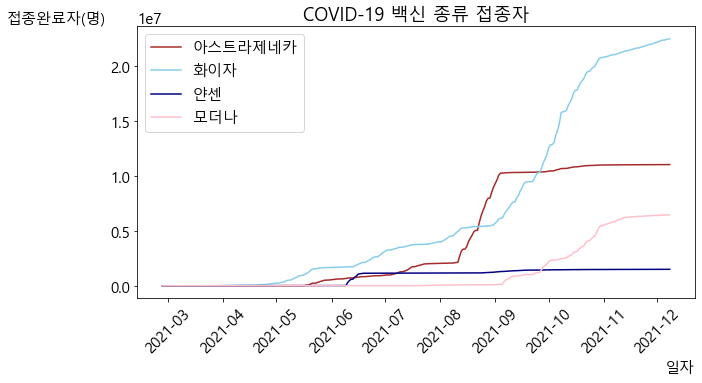

In [11]:
plt.figure(figsize=(10, 5))
plt.title('COVID-19 백신 종류 접종자')
plt.plot(vc4['일자'], vc4['AZ 2차'], color='brown', label='아스트라제네카')
plt.plot(vc4['일자'], vc4['PF 2차'], color='skyblue', label='화이자')
plt.plot(vc4['일자'], vc4['얀센'], color='navy', label='얀센')
plt.plot(vc4['일자'], vc4['M 2차'], color='pink', label='모더나')

plt.legend(loc='upper left');

plt.xlabel('일자',loc='right')
plt.xticks(rotation=45);
plt.ylabel('접종완료자(명)', rotation=0, loc='top');

In [12]:
vc5 = vc.drop(columns = ['1차', '2차', '3차(부스터)', '1차.1', '2차\n(AZ-PF교차포함)', '1차.2',
       '2차\n(교차미포함)', '1차.3', '1차.4', '2차\n(M-Pf 교차 포함)'])
vc5

,Unnamed: 0,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,2021-12-08,3670305,1155867,17325
1,2021-02-26,0,0,0
2,2021-02-27,0,0,0
3,2021-02-28,0,0,0
4,2021-03-01,0,0,0
...,...,...,...,...
282,2021-12-04,3030810,911356,15908
283,2021-12-05,3033226,912520,16038
284,2021-12-06,3246051,988238,16307
285,2021-12-07,3461908,1065751,16684


In [13]:
vc5.columns=['일자', 'PF부스터', 'M부스터', '얀센부스터']
vc5

,일자,PF부스터,M부스터,얀센부스터
0,2021-12-08,3670305,1155867,17325
1,2021-02-26,0,0,0
2,2021-02-27,0,0,0
3,2021-02-28,0,0,0
4,2021-03-01,0,0,0
...,...,...,...,...
282,2021-12-04,3030810,911356,15908
283,2021-12-05,3033226,912520,16038
284,2021-12-06,3246051,988238,16307
285,2021-12-07,3461908,1065751,16684


In [14]:
vc6 = vc5.drop(index=0)
vc6

,일자,PF부스터,M부스터,얀센부스터
1,2021-02-26,0,0,0
2,2021-02-27,0,0,0
3,2021-02-28,0,0,0
4,2021-03-01,0,0,0
5,2021-03-02,0,0,0
...,...,...,...,...
282,2021-12-04,3030810,911356,15908
283,2021-12-05,3033226,912520,16038
284,2021-12-06,3246051,988238,16307
285,2021-12-07,3461908,1065751,16684


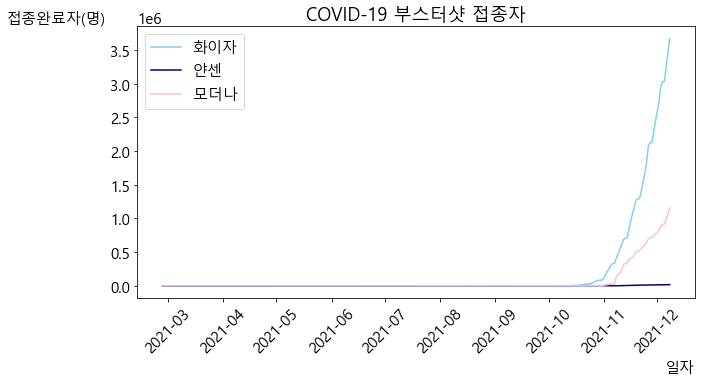

In [15]:
plt.figure(figsize=(10, 5))
plt.title('COVID-19 부스터샷 접종자')
plt.plot(vc6['일자'], vc6['PF부스터'], color='skyblue', label='화이자')
plt.plot(vc6['일자'], vc6['얀센부스터'], color='navy', label='얀센')
plt.plot(vc6['일자'], vc6['M부스터'], color='pink', label='모더나')

plt.legend(loc='upper left');

plt.xlabel('일자',loc='right')
plt.xticks(rotation=45);
plt.ylabel('접종완료자(명)', rotation=0, loc='top');

In [16]:
vc2_time = pd.pivot_table(data = vc2, index = '일자', values = '접종완료', aggfunc = 'sum')
vc2_time.head()

,접종완료
일자,
2021-02-26,5411
2021-02-27,5493
2021-02-28,5545
2021-03-01,5624
2021-03-02,5743


In [17]:
y = vc2_time['접종완료'].resample('1D').mean()

In [18]:
from pylab import rcParams
rcParams['figure.figsize'] = 15, 10
plt.show()

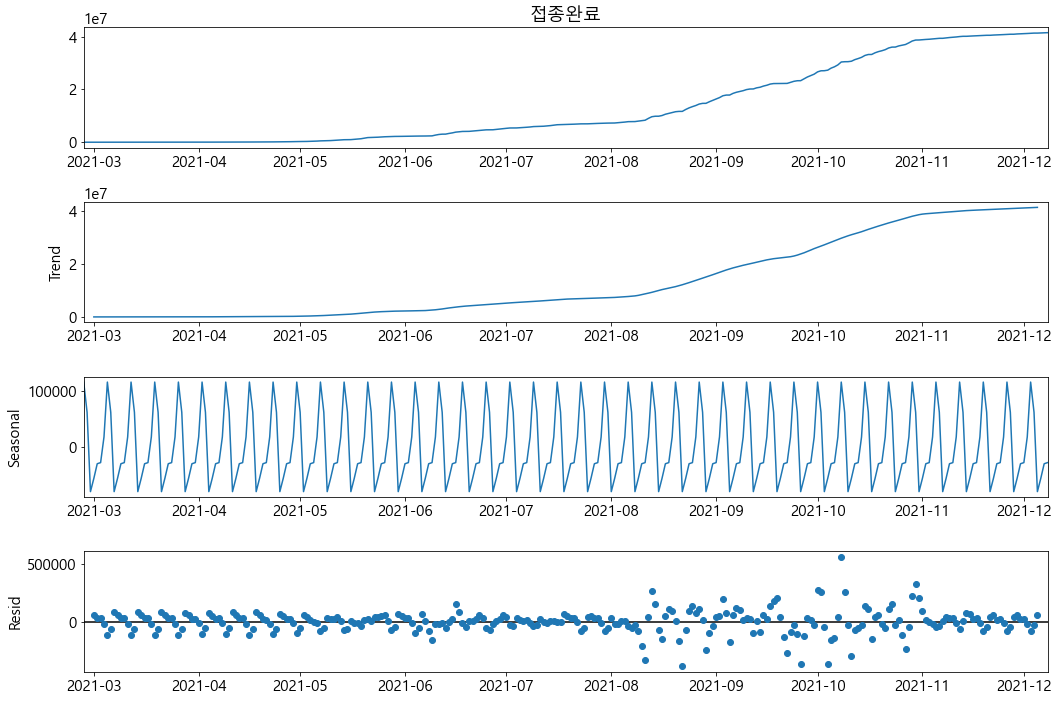

In [20]:
ms = tsa.seasonal_decompose(y, model='additive')
fig = ms.plot()

In [30]:
p = d = q =range (0, 2)
pdq = list(itertools.product(p, d, q))
season_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

In [31]:
season_pdq

[(0, 0, 0, 12),
 (0, 0, 1, 12),
 (0, 1, 0, 12),
 (0, 1, 1, 12),
 (1, 0, 0, 12),
 (1, 0, 1, 12),
 (1, 1, 0, 12),
 (1, 1, 1, 12)]

In [32]:
p_list = []
p_season_list = []
results_AIC_list = []

In [33]:
for param in pdq:
    for p_season in season_pdq:
        try:
            mod = tsa.statespace.SARIMAX(y,order = param,
                                        seasonal_order = p_season,
                                        enforce_stationarity = False,
                                        enforce_inveribility = False)
            results = mod.fit()
            p_list.append(param)
            p_season_list.append(p_season)
            results_AIC_list.append(results.aic)
        except:
            continue

C:\Users\82106\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
C:\Users\82106\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\82106\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\82106\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\82106\anaconda3\lib\site-packages\statsmodels\base\model.py:566: C

In [34]:
ARIMA_list = pd.DataFrame({'Parameter':p_list,'Seasonal':p_season_list,'AIC':results_AIC_list})
ARIMA_list.to_excel('arima_model_list.xlsx')

In [35]:
ARIMA_list.sort_values(by='AIC')

,Parameter,Seasonal,AIC
63,"(1, 1, 1)","(1, 1, 1, 12)",6961.516632
59,"(1, 1, 1)","(0, 1, 1, 12)",6970.907042
27,"(0, 1, 1)","(0, 1, 1, 12)",7011.060515
31,"(0, 1, 1)","(1, 1, 1, 12)",7012.917824
55,"(1, 1, 0)","(1, 1, 1, 12)",7028.769939
...,...,...,...
9,"(0, 0, 1)","(0, 0, 1, 12)",9675.846577
12,"(0, 0, 1)","(1, 0, 0, 12)",9727.886956
1,"(0, 0, 0)","(0, 0, 1, 12)",9791.829769
8,"(0, 0, 1)","(0, 0, 0, 12)",10151.218044


In [36]:
print(results.summary())

                                     SARIMAX Results                                      
Dep. Variable:                               접종완료   No. Observations:                  286
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood               -3475.758
Date:                            Sun, 12 Dec 2021   AIC                           6961.517
Time:                                    20:45:05   BIC                           6979.301
Sample:                                02-26-2021   HQIC                          6968.667
                                     - 12-08-2021                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9905      0.014     69.436      0.000       0.963       1.018
ma.L1         -0.7451      0.057   

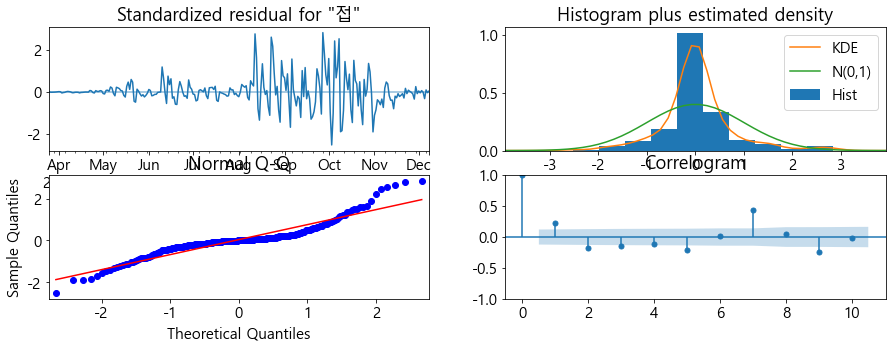

In [37]:
results.plot_diagnostics(figsize=(15, 5));

In [38]:
results.get_prediction();

In [40]:
y.head()

일자
2021-02-26    5411
2021-02-27    5493
2021-02-28    5545
2021-03-01    5624
2021-03-02    5743
Freq: D, Name: 접종완료, dtype: int64

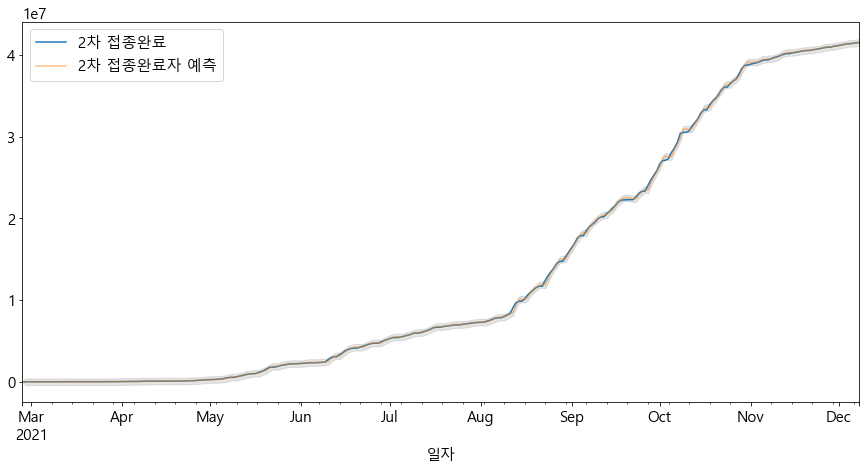

In [41]:
prediction = results.get_prediction(start=pd.to_datetime('2021-02-26'), dynamic=False)
prediction_c = prediction.conf_int()

ax = y.plot(label='2차 접종완료')
prediction.predicted_mean.plot(ax=ax, label='2차 접종완료자 예측', alpha=.5, figsize=(15, 7))
ax.fill_between(prediction_c.index,prediction_c.iloc[:, 0],prediction_c.iloc[:, 1], color='k', alpha=.1)

plt.legend();

In [42]:
prediction = results.get_prediction(start=pd.to_datetime('2021-02-26'), dynamic=False)
pd.DataFrame(prediction.predicted_mean).reset_index();

In [43]:
y_forecast = prediction.predicted_mean
y_truth = y['2021-02-26':]
mse = ((y_forecast - y_truth) ** 2).mean()
print('MSE {}'.format(round(mse, 2)))

MSE 20083677003.8


In [44]:
prediction_u = results.get_forecast(steps=100)

In [45]:
prediction_u.predicted_mean

2021-12-09    4.156402e+07
2021-12-10    4.163043e+07
2021-12-11    4.167012e+07
2021-12-12    4.172332e+07
2021-12-13    4.177096e+07
                  ...     
2022-03-14    4.524941e+07
2022-03-15    4.527781e+07
2022-03-16    4.530595e+07
2022-03-17    4.533704e+07
2022-03-18    4.536603e+07
Freq: D, Name: predicted_mean, Length: 100, dtype: float64

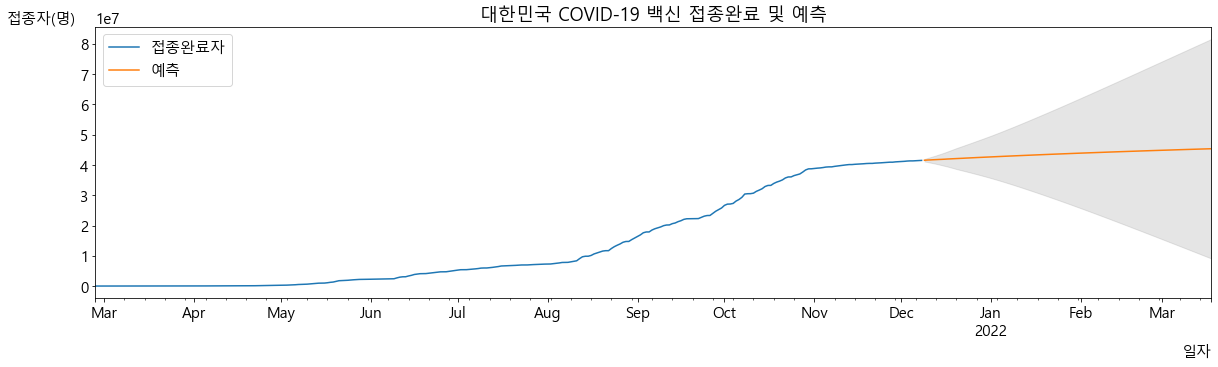

In [47]:
prediction_u = results.get_forecast(steps=100)
prediction_c = prediction_u.conf_int()
ax = y.plot(label='접종완료자', figsize=(20, 5))
prediction_u.predicted_mean.plot(ax=ax, label='예측')
ax.fill_between(prediction_c.index,
                 prediction_c.iloc[:, 0],
                 prediction_c.iloc[:, 1], color='grey', alpha=.2)

plt.title('대한민국 COVID-19 백신 접종완료 및 예측')
plt.legend(loc='upper left')
plt.xlabel('일자', loc = 'right')
plt.ylabel('접종자(명)', rotation=0, loc='top')
plt.savefig('국내 백신접종완료 및 예측.png', dpi=100);